In [1]:
from keras.models import load_model

In [2]:
model=load_model('model2/')

In [3]:
def detect_mask_from_image(img):
    y_pred=model.predict(img.reshape(1,224,224,3))
    y_pred=[0 if x < 0.5 else 1 for x in y_pred]
    final_pred=y_pred[0]
    return pred_dict[final_pred]

In [4]:
def face_mask_detector(img):
    y_pred=model.predict(img.reshape(1,224,224,3))
    y_pred=[0 if x < 0.5 else 1 for x in y_pred]
    return y_pred

In [5]:
import cv2
import matplotlib.pyplot as plt

In [6]:
pred_dict={0:'Mask detected',1:'No mask detected'}

In [7]:
sample_img=cv2.imread('sample1.jpg')
sample_img=cv2.resize(sample_img,(224,224))

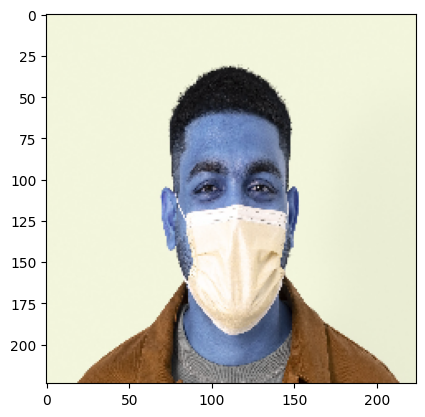

In [8]:
plt.imshow(sample_img)

In [9]:
detect_mask_from_image(sample_img)

1/1 [==============================] - 0s 403ms/step


'Mask detected'

In [10]:
sample_img2=cv2.imread('sample2.jpg')
sample_img2=cv2.resize(sample_img2,(224,224))

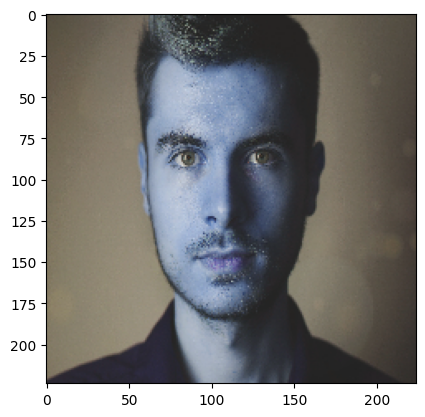

In [11]:
plt.imshow(sample_img2)

In [12]:
detect_mask_from_image(sample_img2)

1/1 [==============================] - 0s 149ms/step


'No mask detected'

In [13]:
def draw_label(img,text,pos,bg_color):
    text_size=cv2.getTextSize(text,cv2.FONT_HERSHEY_SIMPLEX,1,cv2.FILLED)
    end_x=pos[0]+text_size[0][0]+2
    end_y=pos[1]+text_size[0][1]-2
    
    cv2.rectangle(img,pos,(end_x,end_y),bg_color,cv2.FILLED)
    cv2.putText(img,text,pos,cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,0),1,cv2.LINE_AA)

In [14]:
# # cap=cv2.VideoCapture(0)

# while True:
#     ret,frame=cap.read()
#     frame=cv2.resize(frame,(224,224))
#     y_pred=face_mask_detector(frame)
    
#     if y_pred[0]==0:
#         draw_label(frame,'Mask Detected',(30,30),(0,255,0))
#     else:
#         draw_label(frame,'No Mask',(30,30),(0,0,255))
#     cv2.imshow('window',frame)
#     if cv2.waitKey(1) & 0xFF==ord('x'):
#         break
        
# cv2.destroyAllWindows()

In [15]:
haar = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

In [16]:
cap=cv2.VideoCapture(0)

In [21]:
def detect_face(img):
    coods=haar.detectMultiScale(img)
    return coods

In [22]:
while True:
    _, frame = cap.read()
    frame=cv2.resize(frame,(224,224))
    labels = []
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces = haar.detectMultiScale(gray)

    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,255),2)
        roi_gray = gray[y:y+h,x:x+w]
        
    y_pred=face_mask_detector(frame)
    
    if y_pred[0]==0:
        draw_label(frame,'Mask Detected',(30,30),(0,255,0))
    else:
        draw_label(frame,'No Mask',(30,30),(0,0,255))
        
    cv2.imshow('window',frame)
    
    if cv2.waitKey(1) & 0xFF==ord('x'):
        break
        
cv2.destroyAllWindows()

1/1 [==============================] - 0s 152ms/step
